##  E2E Test
This notebook is to run prototype E2E tests rather than automated tests;
however, this code could be copy pasted and ran as an automated test

#### Behavior order
training:
  - Unordered sub-list. 
  * Import all dependencies
  * convert sample audio files to mfcc + delta + deltadelta | (optional) mfcc + SDC
  * illustrae mfcc, delta, deltadelta coefficient
  * create model object
  * train model
  * print loss per batch
  * show graph of loss
  * evaluate model

servicing:
 * time how long it takes to extract coefficients and predict language


In [73]:
from models import gmm, lstm
from extractor import extractor
import os
import importlib
import numpy as np
import matplotlib.pyplot as plt


In [74]:
importlib.reload(extractor)
importlib.reload(lstm)
importlib.reload(gmm)

<module 'models.gmm' from '/Users/oosv/prototype/models/gmm.py'>

In [75]:
data_wav = "/Users/oosv/data/voxforge"
languages = ["english", "spanish"]
TOTAL_FRAMES = 150
ENERGY_MIN = 12
DELTA_DIM = 3
CEPSTRAL_COEF = 13

extractor.total_frames = TOTAL_FRAMES
extractor.energy_threshold = ENERGY_MIN
files = []
data_y = []
num_samples = 100
#get the path for num_samples .wav files
for i,l in enumerate(languages):
    path = os.path.join(data_wav, l)
    for f in os.listdir(path)[:num_samples]:
        files.append(os.path.join(path, f))
    data_y += [i] * len(os.listdir(path)[:num_samples])

print(len(data_y))
data_x , rejected = np.array(extractor.make_feature_set(files))
print(len(data_x), np.shape(data_x[0]))

200


/Users/oosv/miniconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


200 (150, 3, 13)


In [76]:
# reverse rejected index list and remove from y
for idx in rejected[::-1]:
    del data_y[idx]
print(len(data_y))

200


In [77]:
def shuffle_in_unison(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

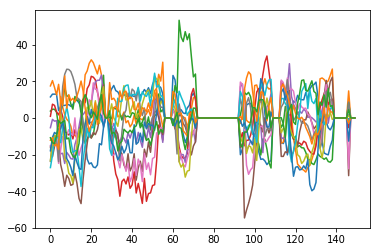

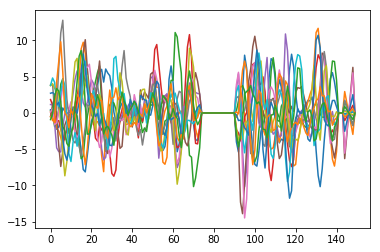

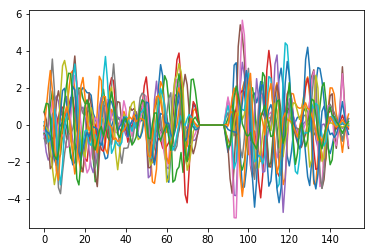

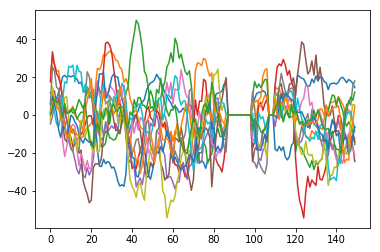

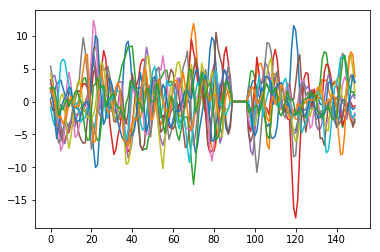

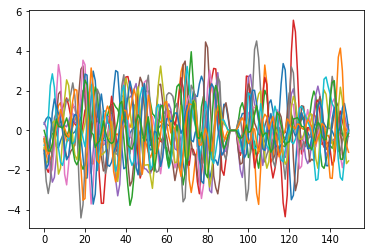

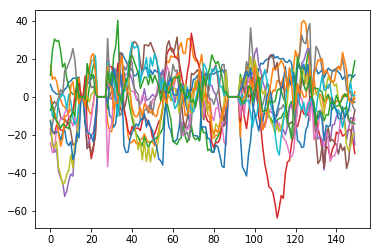

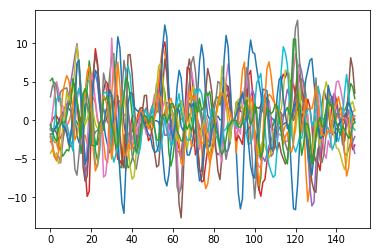

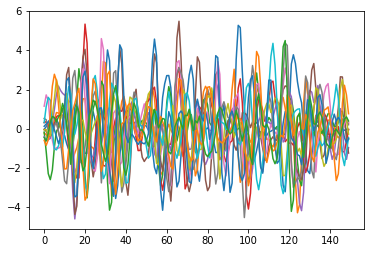

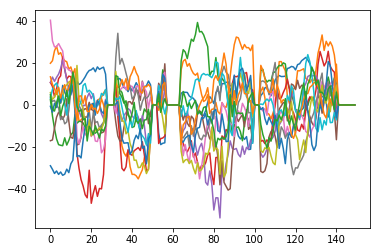

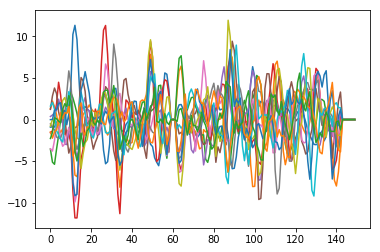

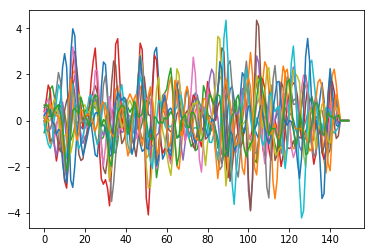

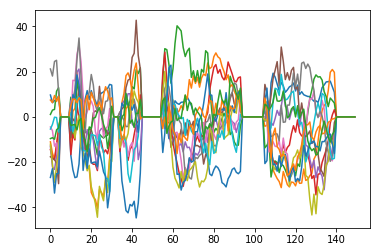

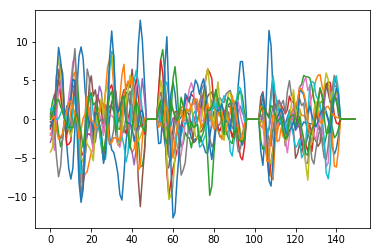

In [78]:
# run to visualize mel frequencies with filtered energy
# do not run for all x's in data_x as it will just not run
for x in data_x[10:15]:
    x = np.swapaxes(x,0,1)
    for delta in x:
        fig,ax = plt.subplots()
        ax.plot([frame for frame in range(len(delta))], delta)
plt.close()

In [79]:
gmm_model = gmm.GMM(n_clusters = [10,10], iter=50, total_frames = 75)

In [83]:
shape = np.shape(data_x)
data_x_gmm = np.reshape(data_x, [shape[0] * shape[1], shape[2] * shape[3]])
gmm_model.train(data_x_gmm[:int(num_samples/2)], 0)
gmm_model.train(data_x_gmm[int(num_samples/2):], 1)

/Users/oosv/miniconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [85]:
# Time model from converting .wav file into an array to final prediction
%%timeit
file = "/Users/oosv/data/voxforge/english/ColinBeckingham-20100116-uja-a0125.wav"
TOTAL_FRAMES = 150
ENERGY_MIN = 13
DELTA_DIM = 3
CEPSTRAL_COEF = 13

extractor.total_frames = TOTAL_FRAMES
extractor.energy_threshold = ENERGY_MIN
data_x = np.array(extractor.get_features(file))
data_x = np.swapaxes(data_x, 0,1)
shape = np.shape(data_x)
data_x = np.reshape(data_x, [int(shape[0]), shape[1] * shape[2]])
scores = gmm_model.predict(data_x)
data_x = 0

/Users/oosv/miniconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


10.9 ms ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
